In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder
import unidecode

En este doc solo voy a tener en cuenta un dataframe. el de winemag-data-2017-2020.csv

Dado el volumen de datos, voy a trabajar solo con los datos de vinos de España.

In [2]:
# Cargamos el dataset principal con el que vamos a trabajar. data/raw/winemag-data-2017-2020.csv
df = pd.read_csv("../data/raw/winemag-data-2017-2020.csv")
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley


In [3]:
# Eliminamos filas que tengan duplicado el valor de la columna title, ya que serían los mismos vinos. Después reordenamos el dataset para que tenga más sentido:
df = df.sort_values(by="points", ascending=False).drop_duplicates(subset="title", keep="first").reset_index(drop=True)
df = df[['title', 'vintage', 'winery', 'variety', 'country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_photo', 'taster_twitter_handle']]

In [4]:
# Filtramos y guardamos en nueva variable el dataframe con los datos de los vinos producidos en España
df_esp = df[df["country"] == "Spain"].copy()
df_esp.head()

,title,vintage,winery,variety,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle
341,CVNE 2016 Pagos de Viña Real (Rioja),2016,CVNE,Tempranillo,Spain,"Ripe, earthy berry aromas include spice notes ...",Pagos de Viña Real,97,125.0,Northern Spain,Rioja,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach
485,CVNE 2011 Imperial Gran Reserva (Rioja),2011,CVNE,Tempranillo,Spain,This is a fabulous gran reserva from a very go...,Imperial Gran Reserva,97,88.0,Northern Spain,Rioja,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach
534,Torres 2011 Reserva Real Red (Penedès),2011,Torres,Bordeaux-style Red Blend,Spain,"Spicy berry aromas are herbal, classy, elevate...",Reserva Real,96,225.0,Catalonia,Penedès,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach
614,Bodega Carmen Rodríguez 2012 Carodorum Selecci...,2012,Bodega Carmen Rodríguez,Tinta de Toro,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach
721,Marco Abella 2012 El Perer Carignan (Priorat),2012,Marco Abella,Carignan,Spain,This single-vineyard Carignan is living proof ...,El Perer,96,770.0,Catalonia,Priorat,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach


In [5]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3455 entries, 341 to 80457
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3455 non-null   object 
 1   vintage                3455 non-null   object 
 2   winery                 3455 non-null   object 
 3   variety                3455 non-null   object 
 4   country                3455 non-null   object 
 5   description            3455 non-null   object 
 6   designation            2868 non-null   object 
 7   points                 3455 non-null   int64  
 8   price                  3356 non-null   float64
 9   province               3455 non-null   object 
 10  region_1               3453 non-null   object 
 11  region_2               0 non-null      object 
 12  taster_name            3455 non-null   object 
 13  taster_photo           3455 non-null   object 
 14  taster_twitter_handle  3455 non-null   object 
dtypes: flo

In [6]:
df_esp.describe(include="all")

,title,vintage,winery,variety,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle
count,3455,3455,3455,3455,3455,3455,2868,3455.000000,3356.000000,3455,3453,0,3455,3455,3455
unique,3455,24,896,129,1,3455,1723,NaN,NaN,8,65,0,1,1,1
top,Love 2015 Tempranillo (Vino de la Tierra de Ca...,2015,Marqués de la Concordia,Tempranillo,Spain,There isn't much to love about this weedy abra...,Crianza,NaN,NaN,Northern Spain,Rioja,NaN,Michael Schachner,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@wineschach
freq,1,682,42,816,3455,1,187,NaN,NaN,2133,936,NaN,3455,3455,3455
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.460492,29.378129,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.160646,37.340768,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_esp.columns[(df_esp.nunique() <= 1)]

Index(['country', 'region_2', 'taster_name', 'taster_photo',
       'taster_twitter_handle'],
      dtype='object')

In [8]:
# Eliminamos todas las columnas con 0 valores o 1 valor, en este caso. region_2, country, taster_name, taster_photo y taster_twitter_handle, ya que no as vamos a utilizar
# Creamos una nueva columna denominada región. En ella se recogerán  los datos de pertenencia. Si no tiene ninguna región, 
# se guardará la provincia de proveniencia y eliminamos la de region_2 que está vacía.

df_esp = df_esp.drop(columns = df_esp.columns[(df_esp.nunique() <= 1)], axis=1)
df_esp["region"] = np.where(df_esp["region_1"].isna() == True, df_esp["province"], df_esp["region_1"])


In [9]:
# Comprobamos las filas donde region_1 está vacío para ver si tiene sentido la provincia como región
df_esp[df_esp["region_1"].isna()]

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region
45864,Bodegas Vegalfaro 2016 Syrah,2016,Bodegas Vegalfaro,Syrah,Grapy berry aromas come with slight volatility...,NaN,89,NaN,Levante,NaN,Levante
54058,Bodegas Vegalfaro 2016 Garnacha Tintorera,2016,Bodegas Vegalfaro,Garnacha Tintorera,"Heavy, spicy berry aromas are concentrated and...",NaN,88,NaN,Levante,NaN,Levante


In [10]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3455 entries, 341 to 80457
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3455 non-null   object 
 1   vintage      3455 non-null   object 
 2   winery       3455 non-null   object 
 3   variety      3455 non-null   object 
 4   description  3455 non-null   object 
 5   designation  2868 non-null   object 
 6   points       3455 non-null   int64  
 7   price        3356 non-null   float64
 8   province     3455 non-null   object 
 9   region_1     3453 non-null   object 
 10  region       3455 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 323.9+ KB


In [11]:
# Creamos otra columna que categorice los vinos en unos rangos de puntuación según la escala de wine enthusiast:
# 6 - 98-100 Classic - The Pinnacle of quality - Clásico: Lo mejor de lo mejor, calidad insuperable.
# 5 - 94-97 Superb - A great achievement - Sobresaliente: Un logro excepcional.
# 4 - 90-93 Excellent - Highly recommended - Excelente: Muy recomendado.
# 3 - 87-89 Very Good - Often good value; well recommended - Muy bueno: Frecuentemente una excelente relación calidad-precio, altamente recomendado.
# 2 - 83-86 Good - Suitable for everyday consumption, often good value - Bueno: Ideal para consumo diario, generalmente con buena relación calidad-precio.
# 1 - 80-82 Acceptable - Can be employed - Aceptable: Apto para su uso o consumo.
# 7 - "Unrated" - "Sin calificación".

def categorize_points(points): 
    if 98 <= points <= 100:
        return "Classic - The Pinnacle of quality (98-100)", 0
    elif 94 <= points <= 97:
        return "Superb - A great achievement (94-97)", 1
    elif 90 <= points <= 93:
        return "Excellent - Highly recommended (90-93)", 2
    elif 87 <= points <= 89:
        return "Very Good - Often good value; well recommended (87-89)", 3
    elif 83 <= points <= 86:
        return "Good - Suitable for everyday consumption, often good value (83-86)", 4
    elif 80 <= points <= 82:
        return "Acceptable - Can be employed (80-82)", 5
    else:
        return "Unrated", 99

df_esp[["category", "category_clas"]] = df_esp["points"].apply(lambda x: pd.Series(categorize_points(x)))


# Mostrar las primeras filas para verificar
print(df_esp[["points", "category", "category_clas"]].head(3))


     points                              category  category_clas
341      97  Superb - A great achievement (94-97)              1
485      97  Superb - A great achievement (94-97)              1
534      96  Superb - A great achievement (94-97)              1


In [12]:
variety = df_esp["variety"].value_counts()
variety

variety
Tempranillo                          816
Red Blends                           310
Sparkling Blend                      296
Tempranillo Blend                    294
Albariño                             174
                                    ... 
Cabernet Franc                         1
Chardonnay-Moscatel de Alejandría      1
Malbec                                 1
Chardonnay-Viura                       1
Txakoli                                1
Name: count, Length: 129, dtype: int64

In [13]:
# Creamos un diccionario que recoja las variedades de vino que pueden categorizarse según el estilo de vino en tintos, blancos, rosados, espumosos y generosos
style_cat = {
    "Red wine": [
        "Bordeaux-style Red Blend", "Red Blends", "Nebbiolo", "Portuguese Red", "Sangiovese", 
        "Gamay", "Pinot Noir", "Rhône-style Red Blend", "Tempranillo", "Tempranillo Blend", 
        "Aglianico", "Montepulciano", "Cabernet Franc", "Merlot", "Barbera", "Garnacha", 
        "Touriga Nacional", "Nero d'Avola", "Grenache-Syrah", "Cabernet Sauvignon", "Primitivo", 
        "Pinot Nero", "Tinta de Toro", "Malbec-Merlot", "Sagrantino", "Encruzado", "Tannat", 
        "Negroamaro", "Petit Verdot", "Syrah-Grenache", "Tempranillo-Garnacha", "Bobal", 
        "Tempranillo-Cabernet Sauvignon", "Baga", "Carignan", "Nero di Troia", "G-S-M", 
        "Monastrell-Syrah", "Graciano", "Tinta del Toro", "Monastrell",
        "Lagrein", "Garnacha-Syrah", "Tinta Roriz", "Grenache-Carignan", "Syrah-Viognier", 
        "Cabernet Sauvignon-Merlot", "Carignan-Grenache", "Carignano", "Nerello Cappuccio", 
        "Tinta del Pais", "Garnacha Tintorera", "Malbec-Tannat", "Cariñena-Garnacha", "Aragonez", 
        "Perricone", "Cesanese", "Lambrusco Salamino", "Tinta Negra Mole", "Braucol", 
        "Alfrocheiro", "Garnacha-Tempranillo", "Susumaniello", "Negrette", "Monastrell-Petit Verdot", 
        "Abouriou", "Touriga Nacional-Cabernet Sauvignon", "Garnacha Blend", "Tannat-Merlot", 
        "Merlot-Tannat", "Fer Servadou", "Syrah-Mourvèdre", "Grenache Blend", "Mourvèdre-Syrah", 
        "Merlot-Malbec", "Prieto Picudo", "Pallagrello Nero", "Merlot-Cabernet", "Merlot-Syrah", 
        "Syrah-Primitivo", "Tempranillo-Graciano", "Tannat-Cabernet Sauvignon", "Pugnitello", 
        "Cabernet Sauvignon-Cabernet Franc", "Rebo", "Bovale", "Magliocco", "Mataro", "Corvina", 
        "Nielluciu", "Tinta Barroca", "Manseng Noir", "Trousseau", "Merlot-Cabernet Franc", "Mourvèdre", "Gaglioppo", 
        "Syrah-Pinot Noir", "Tempranillo-Merlot", "Primitivo-Susumaniello", "Zinfandel", 
        "Bobal-Tempranillo", "Tannat-Malbec", "Fumin", "Grenache Noir", "Tempranillo-Shiraz", 
        "Touriga Nacional-Merlot", "Cabernet Sauvignon-Syrah", "Tinta Francisca", 
        "Touriga Nacional-Touriga Franca", "Touriga Nacional Blend", "Negroamaro-Malvasia", 
        "Syrah-Carignan", "Garnacha-Graciano", "Sirica", "Mazuelo", "Marzemino", 
        "Garnacha-Cariñena", "Cabernet Sauvignon Grenache", "Malbec Blend", "Cabernet", 
        "Monastrell-Garnacha Tintorera", "Primitivo-Cabernet Sauvignon", "Refosco", "Raboso", 
        "Minutolo", "Touriga Nacional-Syrah", "Malbec-Cabernet Franc", "Tinto Velasco", 
        "Syrah", "Malbec", "Nerello Mascalese", "Mencía", "Provence red blend", "Cannonau",
        "Dolcetto", "Alicante Bouschet", "Tannat-Cabernet", "Frappato", "Pinot Noir-Gamay",
        "Lambrusco Grasparossa", "Lambrusco", "Tempranillo Blanco", "Castelão", 
        "Tannat-Cabernet Franc", "Mondeuse", "Piedirosso", "Ciliegiolo", "Alicante", 
        "Touriga Franca", "Garnatxa", "Vinhão", "Airen", "Ramisco", "Cabernet Franc-Cabernet Sauvignon", 
        "Prunelard", "Tempranillo-Syrah", "Monica", "Sousão", "Tinta Fina", 
        "Monastrell-Cabernet Sauvignon", "Shiraz", "Ekigaïna", "Duras", "Cabernet Blend", 
        "Cabernet Sauvignon-Tempranillo", "Corinto Nero", "Nasco", "Foglia Tonda", "Traminer", 
        "Touriga Nacional-Shiraz", "Sciaccerelli", "Casavecchia", "Uvalino", "Tinto del Pais", 
        "Marselan", "Sumoll", "Gragnano", "Molinara", "Viura-Tempranillo Blanco", "Tannat-Syrah", 
        "Colorino", "Syrah-Garnacha", "Camarlet", "Merlot-Cabernet Sauvignon", "Trincadeira", "Teroldego", "Touriga Nacional-Alicante Bouschet"
    ],
    "White wine": [
        "Chardonnay", "Portuguese White", "Sauvignon Blanc", "Bordeaux-style White Blend", 
        "White Blend", "Pinot Gris", "Albariño", "Pinot Blanc", "Sauvignon", "Chenin Blanc", 
        "Garganega", "Verdejo", "Melon", "Arinto", "Cortese", "Viura", "Friulano", "Verdelho", 
        "Xarel-lo", "Trebbiano", "Auxerrois", "Aligoté", "Catarratto", "Macabeo", "Gros Manseng", 
        "Petit Manseng", "Rolle", "Alvarinho", "Chenin Blanc-Chardonnay",
        "Pansa Blanca", "Passerina", "Muscat Ottonel", "Bical", "Erbaluce", "Grechetto", 
        "Verdejo-Viura", "Mauzac", "Caprettone", "Siria", "Chasselas", "Arneis", "Bual", 
        "Pallagrello Bianco", "Insolia", "Viura-Chardonnay", "Jaen", "Verdeca", "Avesso", 
        "Viosinho", "Inzolia", "Savagnin", "Altesse", "Grolleau", "Arinto-Chardonnay", 
        "Colombard-Ugni Blanc", "Chardonnay-Sauvignon Blanc", "Alvarinho-Chardonnay", 
        "Loureiro-Alvarinho", "Malvar", "Colombard", "Loin de l'Oeil", "Sercial", "Poulsard", 
        "Malvasia Nera", "Cerceal", "Catalanesca", "Moreto", "Moscatel Galego Branco", 
        "Tinta Miúda", "Sauvignon Blanc-Chardonnay", "Viura", "Grüner Veltliner", "Timorasso", 
        "Clairette", "Ondenc", "Macabeo-Sauvignon Blanc", "Mantonico", "Rufete", "Greco Bianco", 
        "Grenache-Tempranillo", "Chardonnay-Macabeo", "Sauvignon-Sémillon", "Sciaccerellu", 
        "Carignan-Syrah", "Cercial", "Pigato", "Verdosilla", "Dorona", "Roussanne-Marsanne", 
        "Chardonnay-Viognier", "Mansois", "Biancolella", "Cococciola", "Chasan", "Vespolina", 
        "Nosiola", "Malvasia di Candia", "Biancu Gentile", "Rabigato", "Grenache Gris", "Macabeo-Chardonnay", "Verdejo-Sauvignon Blanc", "Bombino Bianco", 
        "Viura-Sauvignon Blanc", "Albillo", "Sauvignon Blanc-Semillon", "Sauvignon Gris", 
        "Folle Blanche", "Garnatxa Blanca", "Edelzwicker", "Durello", "Roussanne-Grenache Blanc", 
        "Maria Gomes-Bical", "Sauvignon-Arinto", "Loureiro-Arinto", "Merseguera-Sauvignon Blanc", 
        "Bobal-Cabernet Sauvignon", "Gros Plant", "Verdil", "Verduzzo", "Petite Arvine", 
        "Viura-Verdejo", "Romorantin", "Doña Blanca", "Picolit", "Gouveio", "Petit Courbu", 
        "Malvasia del Lazio", "Incrocio Manzoni", "Avesso-Alvarinho", "Centesimino", 
        "Viognier-Chardonnay", "Aragonês", "Colombard-Gros Manseng", "Moscato Giallo", "Cencibel", 
        "Malvasia-Viura", "Trajadura", "Nascetta", "Ortega", "Trebbiano Spoletino", "Treixadura", 
        "Sauvignon Blanc-Verdejo", "Fiano-Chardonnay", "Ugni Blanc", "Fiano-Malvasia", 
        "Chardonnay-Arinto", "Diagalves", "Bianco d'Alessano", "Semillon-Sauvignon Blanc", 
        "Malvasia Bianca", "Riesling", "Rhône-style White Blend", "Gewürztraminer", "Pinot Grigio", "Turbiana", 
        "Fiano", "Vermentino", "Vernaccia", "Pinot Bianco", "Viognier", "Greco", "Falanghina", 
        "Verdicchio", "Grillo", "Alsace white blend", "Sylvaner", "Godello", "Melon de Bourgogne", 
        "Grenache", "Pecorino", "Malvasia", "Tinto Fino", "Gros and Petit Manseng", "Moscato", 
        "Provence white blend", "Durella", "Carricante", "Loureiro", "Garnacha Blanca", "Marsanne", 
        "Sémillon", "Ribolla Gialla", "Jacquère", "Kerner", "Pinot Meunier", "Fernão Pires", 
        "Colombard-Sauvignon Blanc", "Antão Vaz", "Roussanne", "Pinot Auxerrois", "Albana", 
        "Zibibbo", "Coda di Volpe", "Muscat Blanc à Petits Grains", "Müller-Thurgau", 
        "Alvarinho-Trajadura", "Roviello", "Grenache Blanc", "Favorita", "Samarrinho", "Listán Negro", 
        "Nuragus", "Alvarinho-Loureiro", "Cagnulari", "Marsanne-Roussanne", 
        "Viura-Tempranillo Blanco", "Azal", "Meseguera", "Maturana Blanca", "Chardonnay-Viura", 
        "Hondarrabi Zuri", "Muscadelle", "Manzoni"
    ],
    "Rosée": [
        "Rosé", "Rosato", "Portuguese Rosé", "Lambrusco di Sorbara", "Rosado", "Portuguese Rosé", "Gamay Noir", "Trepat", "Canaiolo", "Rosada", "Espadeiro", "Asprinio", "Pineau d'Aunis"
    ],
    "Sparkling": [
        "Sparkling Blend", "Champagne Blend", "Portuguese Sparkling", "Glera", 
        "Grenache-Mourvèdre", "Grenache-Mourvèdre", "Ugni Blanc-Colombard", "Arinto-Chardonnay", "Touriga Nacional-Cabernet Sauvignon", "Txakoli", "Chardonnay-Moscatel de Alejandría"
    ],
    "Fortified/ Dessert wine": [
        "Port", "Sherry", "Pedro Ximénez", "Palomino", "Moscatel", "Muscat", "Moscatel Galego Branco", "Sercial", "Sherry", "Colombard-Ugni Blanc", "Terrantez", "Moscato Rosa", "Muscat d'Alexandrie", "Moscatel Roxo", "Babosa Negro", 
        "Moscatel de Alejandría", "Muscatel", "Boal", "Sciaccerelli", "Jampal", "Carineña"
    ]
}


def clasificar_variedad(variedad):
    for estilo, lista_variedades in style_cat.items():
        if variedad in lista_variedades:
            return estilo
    return "Unknown" 

df_esp["style"] = df_esp["variety"].apply(clasificar_variedad)

df_esp


,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style
341,CVNE 2016 Pagos de Viña Real (Rioja),2016,CVNE,Tempranillo,"Ripe, earthy berry aromas include spice notes ...",Pagos de Viña Real,97,125.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
485,CVNE 2011 Imperial Gran Reserva (Rioja),2011,CVNE,Tempranillo,This is a fabulous gran reserva from a very go...,Imperial Gran Reserva,97,88.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
534,Torres 2011 Reserva Real Red (Penedès),2011,Torres,Bordeaux-style Red Blend,"Spicy berry aromas are herbal, classy, elevate...",Reserva Real,96,225.0,Catalonia,Penedès,Penedès,Superb - A great achievement (94-97),1,Red wine
614,Bodega Carmen Rodríguez 2012 Carodorum Selecci...,2012,Bodega Carmen Rodríguez,Tinta de Toro,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Superb - A great achievement (94-97),1,Red wine
721,Marco Abella 2012 El Perer Carignan (Priorat),2012,Marco Abella,Carignan,This single-vineyard Carignan is living proof ...,El Perer,96,770.0,Catalonia,Priorat,Priorat,Superb - A great achievement (94-97),1,Red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80453,Familia Montaña 2015 Montaña Tinto (Rioja),2015,Familia Montaña,Tempranillo,"An undeniable raisiny nose leads to a soupy, f...",Montaña Tinto,80,11.0,Northern Spain,Rioja,Rioja,Acceptable - Can be employed (80-82),5,Red wine
80454,Love 2015 Chardonnay (Vino de la Tierra de Cas...,2015,Love,Chardonnay,This yeasty funky Chardonnay is on its last le...,NaN,80,9.0,Central Spain,Vino de la Tierra de Castilla,Vino de la Tierra de Castilla,Acceptable - Can be employed (80-82),5,White wine
80455,Viñedos Balmoral 2013 Edoné Gran Cuvée Extra B...,2013,Viñedos Balmoral,Sparkling Blend,Highly volatile and pickled aromas are unpleas...,Edoné Gran Cuvée Extra Brut,80,35.0,Spain Other,Spain,Spain,Acceptable - Can be employed (80-82),5,Sparkling
80456,Roke Eizaguirre 2018 Txakoli (Getariako Txakol...,2018,Roke Eizaguirre,Txakoli,This wine shows bruised apple and muddled citr...,NaN,80,16.0,Northern Spain,Getariako Txakolina,Getariako Txakolina,Acceptable - Can be employed (80-82),5,Sparkling


In [14]:
df_esp["style"].value_counts()


style
Red wine                   2078
White wine                  847
Sparkling                   299
Rosée                       159
Fortified/ Dessert wine      72
Name: count, dtype: int64

In [15]:
df_esp

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style
341,CVNE 2016 Pagos de Viña Real (Rioja),2016,CVNE,Tempranillo,"Ripe, earthy berry aromas include spice notes ...",Pagos de Viña Real,97,125.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
485,CVNE 2011 Imperial Gran Reserva (Rioja),2011,CVNE,Tempranillo,This is a fabulous gran reserva from a very go...,Imperial Gran Reserva,97,88.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
534,Torres 2011 Reserva Real Red (Penedès),2011,Torres,Bordeaux-style Red Blend,"Spicy berry aromas are herbal, classy, elevate...",Reserva Real,96,225.0,Catalonia,Penedès,Penedès,Superb - A great achievement (94-97),1,Red wine
614,Bodega Carmen Rodríguez 2012 Carodorum Selecci...,2012,Bodega Carmen Rodríguez,Tinta de Toro,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Superb - A great achievement (94-97),1,Red wine
721,Marco Abella 2012 El Perer Carignan (Priorat),2012,Marco Abella,Carignan,This single-vineyard Carignan is living proof ...,El Perer,96,770.0,Catalonia,Priorat,Priorat,Superb - A great achievement (94-97),1,Red wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80453,Familia Montaña 2015 Montaña Tinto (Rioja),2015,Familia Montaña,Tempranillo,"An undeniable raisiny nose leads to a soupy, f...",Montaña Tinto,80,11.0,Northern Spain,Rioja,Rioja,Acceptable - Can be employed (80-82),5,Red wine
80454,Love 2015 Chardonnay (Vino de la Tierra de Cas...,2015,Love,Chardonnay,This yeasty funky Chardonnay is on its last le...,NaN,80,9.0,Central Spain,Vino de la Tierra de Castilla,Vino de la Tierra de Castilla,Acceptable - Can be employed (80-82),5,White wine
80455,Viñedos Balmoral 2013 Edoné Gran Cuvée Extra B...,2013,Viñedos Balmoral,Sparkling Blend,Highly volatile and pickled aromas are unpleas...,Edoné Gran Cuvée Extra Brut,80,35.0,Spain Other,Spain,Spain,Acceptable - Can be employed (80-82),5,Sparkling
80456,Roke Eizaguirre 2018 Txakoli (Getariako Txakol...,2018,Roke Eizaguirre,Txakoli,This wine shows bruised apple and muddled citr...,NaN,80,16.0,Northern Spain,Getariako Txakolina,Getariako Txakolina,Acceptable - Can be employed (80-82),5,Sparkling


In [16]:
# limpieza de datos. Eliminamos registros sin año y aplicamos máscara para eliminar vinos que puedan tener un error en el año.
#  Nos quedamos con aquellos que sean menores de 2023 (Estamos en 2024)
df_esp = df_esp[df_esp["vintage"] != "NV"].reset_index(drop=True)
df_esp["vintage"] = df_esp["vintage"].astype(int)
df_esp = df_esp[df_esp["vintage"] <= 2023].reset_index(drop=True)

# También eliminamos aquellos que no tengan precio
df_esp = df_esp.dropna(subset=["price"])

In [17]:
df_esp.head()

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style
0,CVNE 2016 Pagos de Viña Real (Rioja),2016,CVNE,Tempranillo,"Ripe, earthy berry aromas include spice notes ...",Pagos de Viña Real,97,125.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
1,CVNE 2011 Imperial Gran Reserva (Rioja),2011,CVNE,Tempranillo,This is a fabulous gran reserva from a very go...,Imperial Gran Reserva,97,88.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
2,Torres 2011 Reserva Real Red (Penedès),2011,Torres,Bordeaux-style Red Blend,"Spicy berry aromas are herbal, classy, elevate...",Reserva Real,96,225.0,Catalonia,Penedès,Penedès,Superb - A great achievement (94-97),1,Red wine
3,Bodega Carmen Rodríguez 2012 Carodorum Selecci...,2012,Bodega Carmen Rodríguez,Tinta de Toro,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Superb - A great achievement (94-97),1,Red wine
4,Marco Abella 2012 El Perer Carignan (Priorat),2012,Marco Abella,Carignan,This single-vineyard Carignan is living proof ...,El Perer,96,770.0,Catalonia,Priorat,Priorat,Superb - A great achievement (94-97),1,Red wine


In [18]:
df_esp["style"].value_counts()

style
Red wine                   2019
White wine                  802
Rosée                       149
Sparkling                   147
Fortified/ Dessert wine      24
Name: count, dtype: int64

In [19]:
# Dado que de Fortified / Dessert wine hay muy poca muestra, voy a eliminarlos del dataset ya que no tiene mucho sentido utilizar tan pocos registros.
df_esp = df_esp[df_esp["style"] != "Fortified/ Dessert wine"].copy()

In [20]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3117 non-null   object 
 1   vintage        3117 non-null   int64  
 2   winery         3117 non-null   object 
 3   variety        3117 non-null   object 
 4   description    3117 non-null   object 
 5   designation    2554 non-null   object 
 6   points         3117 non-null   int64  
 7   price          3117 non-null   float64
 8   province       3117 non-null   object 
 9   region_1       3117 non-null   object 
 10  region         3117 non-null   object 
 11  category       3117 non-null   object 
 12  category_clas  3117 non-null   int64  
 13  style          3117 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 365.3+ KB


In [21]:
df_esp.describe(include="all")

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style
count,3117,3117.000000,3117,3117,3117,2554,3117.000000,3117.000000,3117,3117,3117,3117,3117.000000,3117
unique,3117,NaN,823,116,3117,1507,NaN,NaN,8,59,59,5,NaN,4
top,Love 2015 Tempranillo (Vino de la Tierra de Ca...,NaN,Marqués de la Concordia,Tempranillo,There isn't much to love about this weedy abra...,Crianza,NaN,NaN,Northern Spain,Rioja,Rioja,Very Good - Often good value; well recommended...,NaN,Red wine
freq,1,NaN,40,798,1,181,NaN,NaN,2054,916,916,1131,NaN,2019
mean,NaN,2014.563041,NaN,NaN,NaN,NaN,87.527430,29.667950,NaN,NaN,NaN,NaN,3.128329,NaN
std,NaN,2.602264,NaN,NaN,NaN,NaN,3.164454,36.143299,NaN,NaN,NaN,NaN,0.928211,NaN
min,NaN,1954.000000,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,85.000000,15.000000,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,88.000000,20.000000,NaN,NaN,NaN,NaN,3.000000,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,90.000000,32.000000,NaN,NaN,NaN,NaN,4.000000,NaN


In [22]:
df_esp.nsmallest(10,"vintage")

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style
1244,De Muller 1954 Avreo Vino de Licor Red (Tarrag...,1954,De Muller,Garnacha Blend,This fortified wine from Tarragona includes ol...,Avreo Vino de Licor,88,38.0,Catalonia,Tarragona,Tarragona,Very Good - Often good value; well recommended...,3,Red wine
643,Bodegas Franco-Españolas 1999 Excelso Gran Res...,1999,Bodegas Franco-Españolas,Tempranillo Blend,Light aromas of citrus and lemon peel suggest ...,Excelso Gran Reserva,90,62.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine
2411,Urbina 1999 Selección (Rioja),1999,Urbina,Tempranillo,A roasted gritty nose suggests both age and un...,Selección,85,30.0,Northern Spain,Rioja,Rioja,"Good - Suitable for everyday consumption, ofte...",4,Red wine
159,Larchago 2000 Chavarri Gran Reserva (Rioja),2000,Larchago,Tempranillo,"Alluring aromas of olive, cola, spiced plum an...",Chavarri Gran Reserva,93,140.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine
313,Sangenís I Vaqué 2000 Clos Monlleó Gran Reserv...,2000,Sangenís I Vaqué,Red Blends,"If you're curious about how Priorat wines age,...",Clos Monlleó Gran Reserva,92,90.0,Catalonia,Priorat,Priorat,Excellent - Highly recommended (90-93),2,Red wine
30,Montecillo 2001 Gran Reserva Selección Especia...,2001,Montecillo,Tempranillo,"The rusty color, the subtle scents of root bee...",Gran Reserva Selección Especial,94,53.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
49,Bodegas Vínícola Real 2001 200 Monges Gran Res...,2001,Bodegas Vínícola Real,Tempranillo Blend,Deep in color and floral aromas as well as sti...,200 Monges Gran Reserva,94,88.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
101,Sangenís I Vaqué 2001 Coranya Red (Priorat),2001,Sangenís I Vaqué,Garnacha-Cariñena,"Rusty and mature in color, with saucy aromas o...",Coranya,93,57.0,Catalonia,Priorat,Priorat,Excellent - Highly recommended (90-93),2,Red wine
174,Gramona 2002 Enoteca Gran Reserva Brut Nature ...,2002,Gramona,Sparkling Blend,"Smoky, yeasty aromas are low on fruit but big ...",Enoteca Gran Reserva Brut Nature,93,225.0,Catalonia,Cava,Cava,Excellent - Highly recommended (90-93),2,Sparkling
487,R. Lopez de Heredia 2004 Viña Tondonia Reserva...,2004,R. Lopez de Heredia,Tempranillo Blend,"Slightly damp, earthy and cool aromas introduc...",Viña Tondonia Reserva,91,51.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine


In [23]:
# También vamos a eliminar el vino más añejo ya que está mal codificado, es un fortified.
df_esp = df_esp.drop(index=1244).copy()

In [24]:
df_esp.nsmallest(10,"vintage")

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style
643,Bodegas Franco-Españolas 1999 Excelso Gran Res...,1999,Bodegas Franco-Españolas,Tempranillo Blend,Light aromas of citrus and lemon peel suggest ...,Excelso Gran Reserva,90,62.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine
2411,Urbina 1999 Selección (Rioja),1999,Urbina,Tempranillo,A roasted gritty nose suggests both age and un...,Selección,85,30.0,Northern Spain,Rioja,Rioja,"Good - Suitable for everyday consumption, ofte...",4,Red wine
159,Larchago 2000 Chavarri Gran Reserva (Rioja),2000,Larchago,Tempranillo,"Alluring aromas of olive, cola, spiced plum an...",Chavarri Gran Reserva,93,140.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine
313,Sangenís I Vaqué 2000 Clos Monlleó Gran Reserv...,2000,Sangenís I Vaqué,Red Blends,"If you're curious about how Priorat wines age,...",Clos Monlleó Gran Reserva,92,90.0,Catalonia,Priorat,Priorat,Excellent - Highly recommended (90-93),2,Red wine
30,Montecillo 2001 Gran Reserva Selección Especia...,2001,Montecillo,Tempranillo,"The rusty color, the subtle scents of root bee...",Gran Reserva Selección Especial,94,53.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
49,Bodegas Vínícola Real 2001 200 Monges Gran Res...,2001,Bodegas Vínícola Real,Tempranillo Blend,Deep in color and floral aromas as well as sti...,200 Monges Gran Reserva,94,88.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine
101,Sangenís I Vaqué 2001 Coranya Red (Priorat),2001,Sangenís I Vaqué,Garnacha-Cariñena,"Rusty and mature in color, with saucy aromas o...",Coranya,93,57.0,Catalonia,Priorat,Priorat,Excellent - Highly recommended (90-93),2,Red wine
174,Gramona 2002 Enoteca Gran Reserva Brut Nature ...,2002,Gramona,Sparkling Blend,"Smoky, yeasty aromas are low on fruit but big ...",Enoteca Gran Reserva Brut Nature,93,225.0,Catalonia,Cava,Cava,Excellent - Highly recommended (90-93),2,Sparkling
487,R. Lopez de Heredia 2004 Viña Tondonia Reserva...,2004,R. Lopez de Heredia,Tempranillo Blend,"Slightly damp, earthy and cool aromas introduc...",Viña Tondonia Reserva,91,51.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine
733,Bodegas Corral 2004 Don Jacobo Gran Reserva (...,2004,Bodegas Corral,Tempranillo Blend,Saucy red-fruit aromas are aided by a subtle s...,Don Jacobo Gran Reserva,90,50.0,Northern Spain,Rioja,Rioja,Excellent - Highly recommended (90-93),2,Red wine


In [25]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3116 non-null   object 
 1   vintage        3116 non-null   int64  
 2   winery         3116 non-null   object 
 3   variety        3116 non-null   object 
 4   description    3116 non-null   object 
 5   designation    2553 non-null   object 
 6   points         3116 non-null   int64  
 7   price          3116 non-null   float64
 8   province       3116 non-null   object 
 9   region_1       3116 non-null   object 
 10  region         3116 non-null   object 
 11  category       3116 non-null   object 
 12  category_clas  3116 non-null   int64  
 13  style          3116 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 365.2+ KB


In [26]:
df_esp.columns

Index(['title', 'vintage', 'winery', 'variety', 'description', 'designation',
       'points', 'price', 'province', 'region_1', 'region', 'category',
       'category_clas', 'style'],
      dtype='object')

<Axes: >

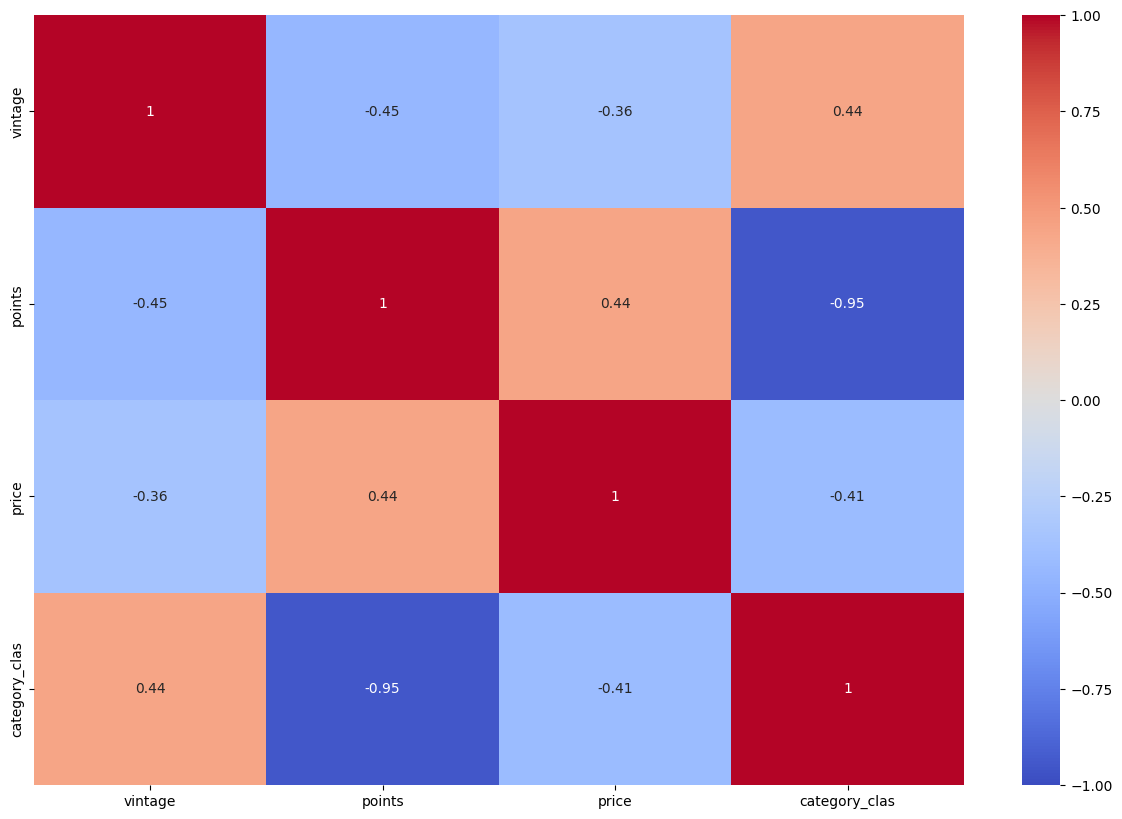

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_esp.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")

In [28]:
df_esp['category_clas'].value_counts()

category_clas
3    1130
4     950
2     786
5     184
1      66
Name: count, dtype: int64

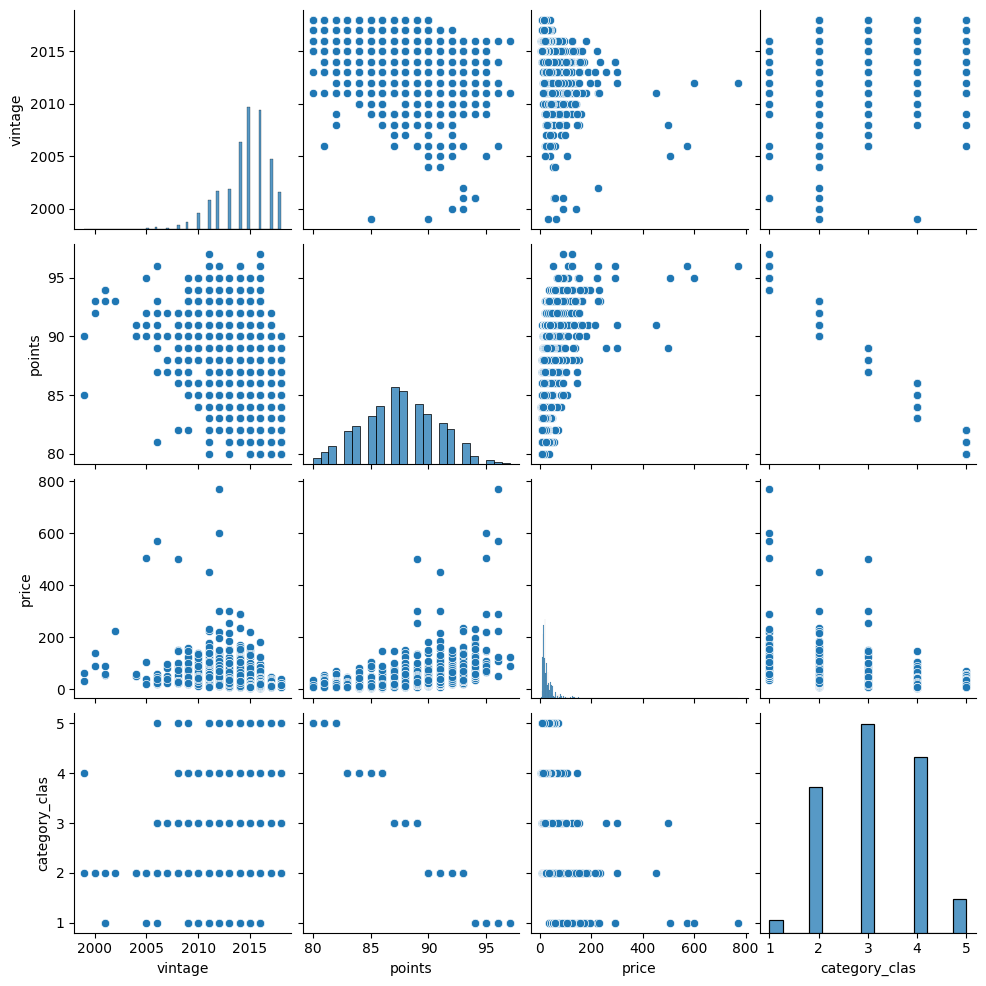

In [29]:
sns.pairplot(df_esp)

In [30]:
df_esp.columns

Index(['title', 'vintage', 'winery', 'variety', 'description', 'designation',
       'points', 'price', 'province', 'region_1', 'region', 'category',
       'category_clas', 'style'],
      dtype='object')

In [31]:
df_esp[df_esp["price"] > 100].groupby(["category","style"]).count()

title  vintage  \
category                                           style                        
Excellent - Highly recommended (90-93)             Red wine       41       41   
                                                   Sparkling       4        4   
                                                   White wine      4        4   
Good - Suitable for everyday consumption, often... Red wine        3        3   
Superb - A great achievement (94-97)               Red wine       23       23   
                                                   White wine      1        1   
Very Good - Often good value; well recommended ... Red wine       11       11   

                                                               winery  \
category                                           style                
Excellent - Highly recommended (90-93)             Red wine        41   
                                                   Sparkling        4   
                                                   White wine       4   
Good - Suitable for everyday consumption, often... Red wine         3   
Superb - A great achievement (94-97)               Red wine        23   
                                                   White wine       1   
Very Good - Often good value; well recommended ... Red wine        11   

                                                               variety  \
category                                           style                 
Excellent - Highly recommended (90-93)             Red wine         41   
                                                   Sparkling         4   
                                                   White wine        4   
Good - Suitable for everyday consumption, often... Red wine          3   
Superb - A great achievement (94-97)               Red wine         23   
                                                   White wine        1   
Very Good - Often good value; well recommended ... Red wine         11   

                                                               description  \
category                                           style                     
Excellent - Highly recommended (90-93)             Red wine             41   
                                                   Sparkling             4   
                                                   White wine            4   
Good - Suitable for everyday consumption, often... Red wine              3   
Superb - A great achievement (94-97)               Red wine             23   
                                                   White wine            1   
Very Good - Often good value; well recommended ... Red wine             11   

                                                               designation  \
category                                           style                     
Excellent - Highly recommended (90-93)             Red wine             39   
                                                   Sparkling             4   
                                                   White wine            3   
Good - Suitable for everyday consumption, often... Red wine              3   
Superb - A great achievement (94-97)               Red wine             23   
                                                   White wine            1   
Very Good - Often good value; well recommended ... Red wine             11   

                                                               points  price  \
category                                           style                       
Excellent - Highly recommended (90-93)             Red wine        41     41   
                                                   Sparkling        4      4   
                                                   White wine       4      4   
Good - Suitable for everyday consumption, often... Red wine         3      3   
Superb - A great achievement (94-97)               Red wine        23     23   
                                          

In [32]:
df_esp[df_esp["price"] > 200].groupby(["category","style"]).count()

title  vintage  \
category                                           style                       
Excellent - Highly recommended (90-93)             Red wine       4        4   
                                                   Sparkling      1        1   
Superb - A great achievement (94-97)               Red wine      10       10   
Very Good - Often good value; well recommended ... Red wine       3        3   

                                                              winery  variety  \
category                                           style                        
Excellent - Highly recommended (90-93)             Red wine        4        4   
                                                   Sparkling       1        1   
Superb - A great achievement (94-97)               Red wine       10       10   
Very Good - Often good value; well recommended ... Red wine        3        3   

                                                              description  \
category                                           style                    
Excellent - Highly recommended (90-93)             Red wine             4   
                                                   Sparkling            1   
Superb - A great achievement (94-97)               Red wine            10   
Very Good - Often good value; well recommended ... Red wine             3   

                                                              designation  \
category                                           style                    
Excellent - Highly recommended (90-93)             Red wine             4   
                                                   Sparkling            1   
Superb - A great achievement (94-97)               Red wine            10   
Very Good - Often good value; well recommended ... Red wine             3   

                                                              points  price  \
category                                           style                      
Excellent - Highly recommended (90-93)             Red wine        4      4   
                                                   Sparkling       1      1   
Superb - A great achievement (94-97)               Red wine       10     10   
Very Good - Often good value; well recommended ... Red wine        3      3   

                                                              province  \
category                                           style                 
Excellent - Highly recommended (90-93)             Red wine          4   
                                                   Sparkling         1   
Superb - A great achievement (94-97)               Red wine         10   
Very Good - Often good value; well recommended ... Red wine          3   

                                                              region_1  \
category                                           style                 
Excellent - Highly recommended (90-93)             Red wine          4   
                                                   Sparkling         1   
Superb - A great achievement (94-97)               Red wine         10   
Very Good - Often good value; well recommended ... Red wine          3   

                                                              region  \
category                                           style               
Excellent - Highly recommended (90-93)             Red wine        4   
                                                   Sparkling       1   
Superb - A great achievement (94-97)               Red wine       10   
Very Good - Often good value; well recommended ... Red wine        3   

                                                              category_clas  
category                                           style                     
Excellent - Highly recommended (90-93)             Red wine               4  
                                                   Sparkling              1  
Superb - A great achievement (94-97)               Red win

In [33]:
df_esp[df_esp["price"] <= 100].groupby(["category","style"]).count()

title  vintage  \
category                                           style                        
Acceptable - Can be employed (80-82)               Red wine      100      100   
                                                   Rosée          22       22   
                                                   Sparkling       4        4   
                                                   White wine     58       58   
Excellent - Highly recommended (90-93)             Red wine      619      619   
                                                   Rosée           7        7   
                                                   Sparkling      35       35   
                                                   White wine     76       76   
Good - Suitable for everyday consumption, often... Red wine      504      504   
                                                   Rosée          89       89   
                                                   Sparkling      25       25   
                                                   White wine    329      329   
Superb - A great achievement (94-97)               Red wine       40       40   
                                                   White wine      2        2   
Very Good - Often good value; well recommended ... Red wine      677      677   
                                                   Rosée          31       31   
                                                   Sparkling      79       79   
                                                   White wine    332      332   

                                                               winery  \
category                                           style                
Acceptable - Can be employed (80-82)               Red wine       100   
                                                   Rosée           22   
                                                   Sparkling        4   
                                                   White wine      58   
Excellent - Highly recommended (90-93)             Red wine       619   
                                                   Rosée            7   
                                                   Sparkling       35   
                                                   White wine      76   
Good - Suitable for everyday consumption, often... Red wine       504   
                                                   Rosée           89   
                                                   Sparkling       25   
                                                   White wine     329   
Superb - A great achievement (94-97)               Red wine        40   
                                                   White wine       2   
Very Good - Often good value; well recommended ... Red wine       677   
                                                   Rosée           31   
                                                   Sparkling       79   
                                                   White wine     332   

                                                               variety  \
category                                           style                 
Acceptable - Can be employed (80-82)               Red wine        100   
                                                   Rosée            22   
                                                   Sparkling         4   
                                                   White wine       58   
Excellent - Highly recommended (90-93)             Red wine        619   
                                                   Rosée             7   
                                                   Sparkling        35   
                                                   White wine       76   
Good - Suitable for everyday consumption, often... Red wine        504   
                                                   Rosée            89   
                                                   Sparkling        25   
                   

In [34]:
df_esp["style"].value_counts()

style
Red wine      2018
White wine     802
Rosée          149
Sparkling      147
Name: count, dtype: int64

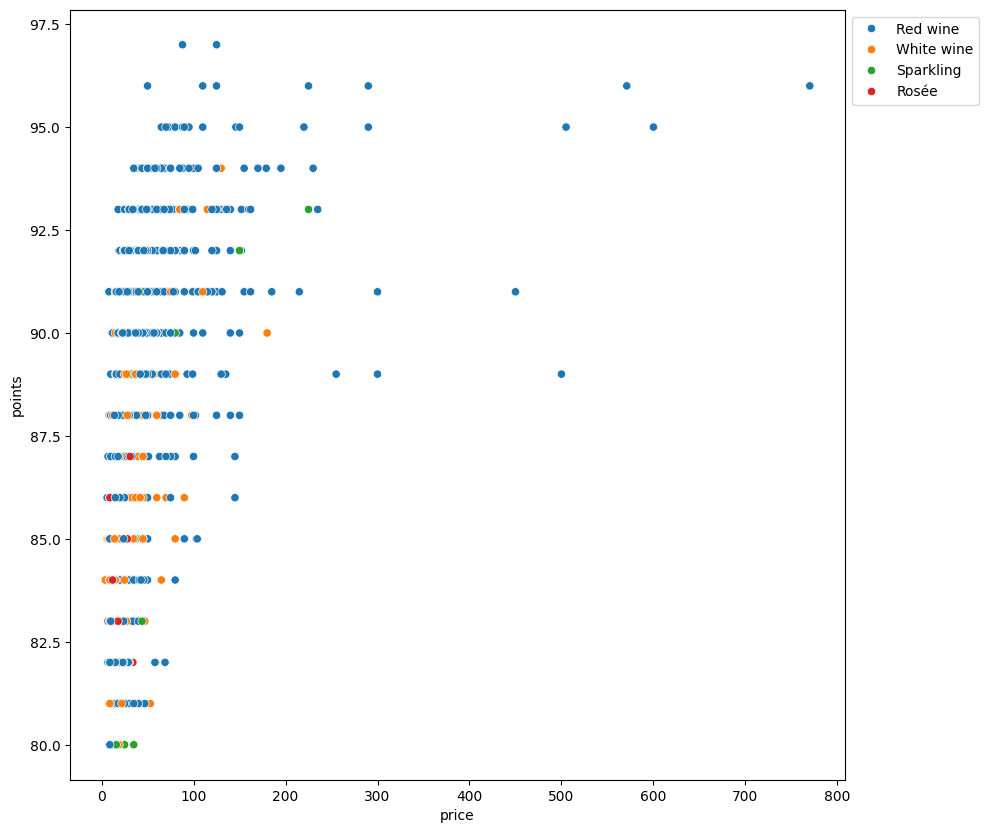

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_esp, y="points", x= "price", hue="style")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [36]:
df_esp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3116 non-null   object 
 1   vintage        3116 non-null   int64  
 2   winery         3116 non-null   object 
 3   variety        3116 non-null   object 
 4   description    3116 non-null   object 
 5   designation    2553 non-null   object 
 6   points         3116 non-null   int64  
 7   price          3116 non-null   float64
 8   province       3116 non-null   object 
 9   region_1       3116 non-null   object 
 10  region         3116 non-null   object 
 11  category       3116 non-null   object 
 12  category_clas  3116 non-null   int64  
 13  style          3116 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 365.2+ KB


In [37]:
keywords = ['Joven', 'Crianza', 'Reserva', 'Gran Reserva', 'Roble']
def check_keywords(text, keywords):
    if isinstance(text, str):  # Comprobar que el texto sea una cadena
        return [keyword for keyword in keywords if keyword in text]
    else:
        return []  # Devolver una lista vacía si el valor no es una cadena

# Aplicar la función y manejar valores no iterables
df_esp["top_designation"] = df_esp["designation"].apply(lambda x: check_keywords(x, keywords))

# Función para eliminar redundancias de "Reserva" y "Selección"
def remove_redundant_keywords(keyword_list):
    # Eliminar "Reserva" si hay términos más específicos que contienen "Reserva"
    if "Reserva" in keyword_list:
        keyword_list = [k for k in keyword_list if k != "Reserva" or all("Reserva" not in other or k == other for other in keyword_list)]
    return keyword_list

# Aplicar la función para limpiar las listas
df_esp["top_designation_cleaned"] = df_esp["top_designation"].apply(remove_redundant_keywords)
# Rellenar valores nulos y convertir a string
df_esp["top_designation_cleaned_2"] = df_esp["top_designation_cleaned"].fillna('Ns').astype(str)
# Eliminar corchetes y otros caracteres no deseados
df_esp["top_designation_cleaned_3"] = df_esp['top_designation_cleaned_2'].str.replace(r'\[|\]', '', regex=True)
# Dividir los valores por coma y expandirlos en columnas
split_columns = df_esp["top_designation_cleaned_3"].str.split(',', expand=True)
# Renombrar dinámicamente las columnas generadas
split_columns.columns = [f'aging_{i+1}' for i in range(split_columns.shape[1])]
# Eliminar las comillas y espacios en las columnas generadas
for col in split_columns.columns:
    split_columns[col] = split_columns[col].str.replace("'", "").str.strip()
# Reemplazar cadenas vacías (valores vacíos) por "No Aplica"
split_columns = split_columns.replace(r'^\s*$', "No Aplica", regex=True)
# Reemplazar valores None o NaN por "No Aplica" (si hay nulos adicionales)
split_columns = split_columns.fillna("No Aplica")
# Eliminar columnas originales relacionadas con "top"
df_esp = df_esp.drop(columns=[col for col in df_esp.columns if "top" in col])
# Concatenar las nuevas columnas con el DataFrame original
df_esp = pd.concat([df_esp, split_columns], axis=1)

In [38]:
df_esp.head(3)

,title,vintage,winery,variety,description,designation,points,price,province,region_1,region,category,category_clas,style,aging_1
0,CVNE 2016 Pagos de Viña Real (Rioja),2016,CVNE,Tempranillo,"Ripe, earthy berry aromas include spice notes ...",Pagos de Viña Real,97,125.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine,No Aplica
1,CVNE 2011 Imperial Gran Reserva (Rioja),2011,CVNE,Tempranillo,This is a fabulous gran reserva from a very go...,Imperial Gran Reserva,97,88.0,Northern Spain,Rioja,Rioja,Superb - A great achievement (94-97),1,Red wine,Gran Reserva
2,Torres 2011 Reserva Real Red (Penedès),2011,Torres,Bordeaux-style Red Blend,"Spicy berry aromas are herbal, classy, elevate...",Reserva Real,96,225.0,Catalonia,Penedès,Penedès,Superb - A great achievement (94-97),1,Red wine,Reserva


In [39]:
dop_igp = [
    "3 Riberas", "Abadía Retuerta", "Abona", "Alella", "Alicante", "Almansa", 
    "Altiplano de Sierra Nevada", "Arlanza", "Arribes", "Aylés", "Bailén", 
    "Bajo Aragón", "Barbanza e Iria", "Betanzos", "Bierzo", "Binissalem", 
    "Bolandin", "Bullas", "Cádiz", "Calatayud", "Calzadilla", "Campo de Borja", 
    "Campo de Cartagena", "Campo de la Guardia", "Cangas", "Cariñena", 
    "Casa del Blanco", "Castelló", "Castilla", "Castilla y León", "Catalunya", 
    "Cava", "Cebreros", "Chozas Carrascal", "Cigales", "Conca de Barberá", 
    "Condado de Huelva", "Córdoba", "Costa de Cantabria", "Costers del Segre", 
    "Cumbres del Guadalfeo", "Dehesa del Carrizal", "Dehesa Peñalba", 
    "Desierto de Almería", "Dominio de Valdepusa", "El Hierro", "El Terrerazo", 
    "El Vicario", "Empordà", "Extremadura", "Finca Élez", "Formentera", 
    "Gran Canaria", "Granada", "Guijoso", "Ibiza", "Illes Balears", 
    "Isla de Menorca", "Islas Canarias", "Jerez-Xérès-Sherry", "Jumilla", 
    "La Gomera", "La Jaraba", "La Mancha", "La Palma", "Laderas del Genil", 
    "Lanzarote", "Laujar-Alpujarra", "Lebrija", "León", "Liébana", 
    "Los Balagueses", "Los Cerrillos", "Los Palacios", "Málaga", "Mallorca", 
    "Manchuela", "Manzanilla-Sanlúcar de Barrameda", "Méntrida", "Mondéjar", 
    "Monterrei", "Montilla-Moriles", "Montsant", "Murcia", "Navarra", 
    "Norte de Almería", "Pago de Arínzano", "Pago de Otazu", "Pago Florentino", 
    "Penedés", "Pla de Bages", "Pla i Llevant", "Prado de Irache", "Priorat", 
    "Rías Baixas", "Ribeira Sacra", "Ribeiras do Morrazo", "Ribeiro", 
    "Ribera del Andarax", "Ribera del Duero", "Ribera del Gállego-Cinco Villas", 
    "Ribera del Guadiana", "Ribera del Jiloca", "Ribera del Júcar", 
    "Ribera del Queiles", "Rioja", "Rueda", "Serra de Tramuntana-Costa Nord", 
    "Sierra de Salamanca", "Sierra Norte de Sevilla", "Sierra Sur de Jaén", 
    "Sierras de Las Estancias y Los Filabres", "Sierras de Málaga", "Somontano", 
    "Tacoronte-Acentejo", "Tarragona", "Terra Alta", "Tierra del Vino de Zamora", 
    "Toro", "Torreperogil", "Txakoli de Álava", "Txakoli de Bizkaia", 
    "Getariako Txakolina", "Uclés", "Urueña", "Utiel-Requena", "Valdejalón", 
    "Valdeorras", "Valdepeñas", "Valencia", "Valle de Güímar", 
    "Valle de La Orotava", "Valle del Cinca", "Valle del Miño-Ourense", 
    "Vallegarcía", "Valles de Benavente", "Valles de Sadacia", "Valtiendas", 
    "Vera de Estenas", "Villaviciosa de Córdoba", "Vinos de Madrid", 
    "Ycoden-Daute-Isora", "Yecla"
]

# Para generar la columana con las denomianciones
# Normalizar denominaciones (sin tildes, minúsculas)
denominaciones_normalizadas = [unidecode.unidecode(d.lower()) for d in dop_igp]

# Crear una nueva columna con la denominación encontrada o un valor por defecto
def find_denominacion(region):
    region_normalizada = unidecode.unidecode(region.lower())
    for denom, denom_normal in zip(dop_igp, denominaciones_normalizadas):
        if denom_normal in region_normalizada:
            return denom
    return "Otros"

# Aplicar la función a cada fila
df_esp['denominacion'] = df_esp['region'].apply(find_denominacion)

In [40]:
df_esp.columns

Index(['title', 'vintage', 'winery', 'variety', 'description', 'designation',
       'points', 'price', 'province', 'region_1', 'region', 'category',
       'category_clas', 'style', 'aging_1', 'denominacion'],
      dtype='object')

In [41]:
df_esp_def = df_esp[['title', 'vintage', 'winery', 'style', 'variety', 'denominacion', 'price',  'designation','aging_1',
    'region', 'description', 'points']]

In [42]:
df_esp_def.head(3)

,title,vintage,winery,style,variety,denominacion,price,designation,aging_1,region,description,points
0,CVNE 2016 Pagos de Viña Real (Rioja),2016,CVNE,Red wine,Tempranillo,Rioja,125.0,Pagos de Viña Real,No Aplica,Rioja,"Ripe, earthy berry aromas include spice notes ...",97
1,CVNE 2011 Imperial Gran Reserva (Rioja),2011,CVNE,Red wine,Tempranillo,Rioja,88.0,Imperial Gran Reserva,Gran Reserva,Rioja,This is a fabulous gran reserva from a very go...,97
2,Torres 2011 Reserva Real Red (Penedès),2011,Torres,Red wine,Bordeaux-style Red Blend,Penedés,225.0,Reserva Real,Reserva,Penedès,"Spicy berry aromas are herbal, classy, elevate...",96


In [ ]:
# Una vez definido el dataframe con el que vamos a trabajar, vamos a exportarlo a un csv como dataframe procesado y vamos a dividirlo en train/test y exportarlos también para entrenar nuestros modelos
# uno para entrenar el modelo y otro para evaluarlo.
df_esp_def.to_csv("../data/processed/df_esp_def.csv", index=False)


df_train, df_test = train_test_split(df_esp_def, 
                                     test_size=0.20,
                                     random_state=63)

df_train.to_csv("../data/train/df_esp_def_train.csv", index=False)
df_test.to_csv("../data/test/df_esp_def_test.csv", index=False)

In [45]:
wineries = list(df_esp_def["winery"].unique())
wineries

['CVNE',
 'Torres',
 'Bodega Carmen Rodríguez',
 'Marco Abella',
 'Vega Sicilia',
 'Valderiz',
 'Terroir Al Límit',
 'Garmón',
 'Vizcarra',
 'Numanthia',
 'Muga',
 'Valduero',
 'Maurodos',
 'Emilio Moro',
 'García Figuero',
 'Finca Allende',
 'Teso La Monja',
 'Dominio de Atauta',
 'Montecillo',
 'Matarromera',
 'Celler Pasanau',
 'Legón',
 'El Coto',
 'Contino',
 'Finca la Rinconada',
 'Resalte',
 '12 Linajes',
 'Maetierra Dominum',
 'Marqués de Vargas',
 'Elias Mora',
 'Valserrano',
 'Bodegas Vínícola Real',
 'Hidalgo',
 'Casa Primicia',
 'Vall Llach',
 'La Gitana',
 'Remelluri',
 'Cartago',
 'Emina',
 'TR3',
 'Sierra Cantabria',
 'Pago de Carraovejas',
 'Ferrer Bobet',
 'Bodegas y Viñedos Tábula',
 'San Román Bodegas y Viñedos',
 'Balbas',
 'Astrales',
 "Mas d'en Gil",
 'Cepa 21',
 'Bodegas Riojanas',
 'Marqués de Cáceres',
 'Raventós I Blanc',
 'Bodegas Tobía',
 'Remírez de Ganuza',
 'Livius',
 'Olivier Rivière',
 'Bodegas Bilbainas',
 'Godelia',
 'Portal del Priorat',
 'Sangenís I

In [47]:
# Creamos un diccionario con los diccionarios o listas necesarios para la aplicación
options_dict = {"wineries": wineries,
                "denominacion": dop_igp,
                "variety": variety,
                "style": style_cat, # incluye estilo (blanco, tinto) y variedad de uva
                "aging": keywords}

In [48]:
options_dict

{'wineries': ['CVNE',
  'Torres',
  'Bodega Carmen Rodríguez',
  'Marco Abella',
  'Vega Sicilia',
  'Valderiz',
  'Terroir Al Límit',
  'Garmón',
  'Vizcarra',
  'Numanthia',
  'Muga',
  'Valduero',
  'Maurodos',
  'Emilio Moro',
  'García Figuero',
  'Finca Allende',
  'Teso La Monja',
  'Dominio de Atauta',
  'Montecillo',
  'Matarromera',
  'Celler Pasanau',
  'Legón',
  'El Coto',
  'Contino',
  'Finca la Rinconada',
  'Resalte',
  '12 Linajes',
  'Maetierra Dominum',
  'Marqués de Vargas',
  'Elias Mora',
  'Valserrano',
  'Bodegas Vínícola Real',
  'Hidalgo',
  'Casa Primicia',
  'Vall Llach',
  'La Gitana',
  'Remelluri',
  'Cartago',
  'Emina',
  'TR3',
  'Sierra Cantabria',
  'Pago de Carraovejas',
  'Ferrer Bobet',
  'Bodegas y Viñedos Tábula',
  'San Román Bodegas y Viñedos',
  'Balbas',
  'Astrales',
  "Mas d'en Gil",
  'Cepa 21',
  'Bodegas Riojanas',
  'Marqués de Cáceres',
  'Raventós I Blanc',
  'Bodegas Tobía',
  'Remírez de Ganuza',
  'Livius',
  'Olivier Rivière',
 

In [49]:
pickle.dump(options_dict, open("../src/options_dict.pkl", "wb"))